**Infos**

This project presents a Python simulation in which a Linear Regression machine learning model is integrated to model the behavior of a traffic light at an intersection and make traffic congestion prediction.

**DataSet**
*   time_of_day: Time (Between 8-17)
*   day_of_week: Weekdays (0= Monday, 1= Tuesday, 2= Wednesday).
*   num_cars: Number of cars.
*   congestion: Traffic congestion level (between 0-1).










In [ ]:
import os
from sklearn.linear_model import LinearRegression
import random
import pandas as pd


In [ ]:
import pandas as pd

# Veri tanimlanir
data = {
    "time_of_day": [8, 9, 10, 11, 12, 13, 14, 15, 16, 17] * 3,
    "day_of_week": [0] * 10 + [1] * 10 + [2] * 10,
    "num_cars": [120, 150, 90, 75, 110, 130, 80, 140, 160, 170,
                 100, 120, 85, 70, 100, 120, 90, 140, 150, 160,
                 110, 140, 100, 80, 120, 150, 100, 160, 180, 200],
    "congestion": [0.65, 0.85, 0.45, 0.35, 0.60, 0.70, 0.40, 0.75, 0.90, 0.95,
                   0.55, 0.65, 0.40, 0.30, 0.55, 0.65, 0.45, 0.75, 0.85, 0.90,
                   0.60, 0.75, 0.55, 0.40, 0.65, 0.85, 0.55, 0.90, 1.00, 1.10],
}

# Veri kumesi olusturulur ve kaydedilir
df = pd.DataFrame(data)
df.to_csv("traffic_data.csv", index=False)
print("Dataset saved as traffic_data.csv!")

Dataset saved as traffic_data.csv!


In [ ]:
# TrafficLight Sınıfı
class TrafficLight:
    def __init__(self, location):
        self.location = location
        self.state = "Yellow"
        self.timer = 30  # Başlangıçta Yeşil ışığı 30 saniye

    def change_state(self):
        """Trafik ışığı durumlarını döngüsel olarak değiştirir."""
        if self.state == "Green":
            self.state = "Red"
        elif self.state == "Red":
            self.state = "Yellow"
        else:
            self.state = "Green"

    def adjust_timer(self, predicted_traffic):
        """Tahmin edilen trafik yoğunluğuna göre zamanlayıcıyı ayarlar."""
        if self.state == "Red":
            self.timer = 30 + (predicted_traffic * 20)
        elif self.state == "Green":
            self.timer = 30 + (predicted_traffic * 20)
        else:
            self.state == "Yellow"
            self.timer = 10    # Yellow ışığı da trafik yoğunluğuna bağlı

In [ ]:

# Makine Öğrenimi Modeli (Linear Regression)
def train_model():
    # Veri yüklenir ve doğruluk
    try:
        df = pd.read_csv("traffic_data.csv")  # Dosya yolu
    except FileNotFoundError:
        print("traffic_data.csv dosyası bulunamadı.")
        return None

    # Özellikler ve hedef değişkeni belirlenir
    X = df[["time_of_day", "day_of_week", "num_cars"]]  # Özellikler
    y = df["congestion"]  # Hedef (trafik yoğunluğu)

    # Model eğitilir
    model = LinearRegression()
    model.fit(X, y)

    return model

In [ ]:
# Simulasyon
def run_simulation():
    # Trafik isiklarini baslat
    traffic_light = TrafficLight("Intersection 1")

    # Model egitilir
    model = train_model()
    if model is None:
        return  # Model yuklenmediyse simulasyon calismaz

    # 2 saatlik simulasyon baslatilir (120 dakika)
    for minute in range(120):
        # Gunun saatini hesapla (8:00'den baslayarak)
        time_of_day = (minute // 60 + 8) % 24  # 24 saatlik formata donustur
        day_of_week = 2  # Carsamba gunu (sabit)
        num_cars = random.randint(50, 150)  # Rastgele arac sayisi

        # Trafik durumu tahmin edilir
        input_data = pd.DataFrame([[time_of_day, day_of_week, num_cars]], columns=["time_of_day", "day_of_week", "num_cars"])
        predicted_traffic = model.predict(input_data)[0]

        # Zamanlayici ayarlanir ve trafik isiginin durumunu degistirilir
        traffic_light.change_state()
        traffic_light.adjust_timer(predicted_traffic)


        # Trafik isiginin durumu loglanir
        print(f"Time: {time_of_day}:{minute % 60:02d}, State: {traffic_light.state}, Timer: {traffic_light.timer}s, Predicted Traffic: {predicted_traffic:.2f}")

# Calisma dizini kontrolu
print("Current working directory:", os.getcwd())

# Simulasyon calistirilir
run_simulation()

Current working directory: /content
Time: 8:00, State: Green, Timer: 46.684780253639666s, Predicted Traffic: 0.83
Time: 8:01, State: Red, Timer: 40.97966069262727s, Predicted Traffic: 0.55
Time: 8:02, State: Yellow, Timer: 10s, Predicted Traffic: 0.29
Time: 8:03, State: Green, Timer: 36.266735837877896s, Predicted Traffic: 0.31
Time: 8:04, State: Red, Timer: 45.56856120909376s, Predicted Traffic: 0.78
Time: 8:05, State: Yellow, Timer: 10s, Predicted Traffic: 0.36
Time: 8:06, State: Green, Timer: 46.808804591922545s, Predicted Traffic: 0.84
Time: 8:07, State: Red, Timer: 38.12710091212107s, Predicted Traffic: 0.41
Time: 8:08, State: Yellow, Timer: 10s, Predicted Traffic: 0.53
Time: 8:09, State: Green, Timer: 46.684780253639666s, Predicted Traffic: 0.83
Time: 8:10, State: Red, Timer: 37.631003558989555s, Predicted Traffic: 0.38
Time: 8:11, State: Yellow, Timer: 10s, Predicted Traffic: 0.45
Time: 8:12, State: Green, Timer: 44.45234216454786s, Predicted Traffic: 0.72
Time: 8:13, State: Red

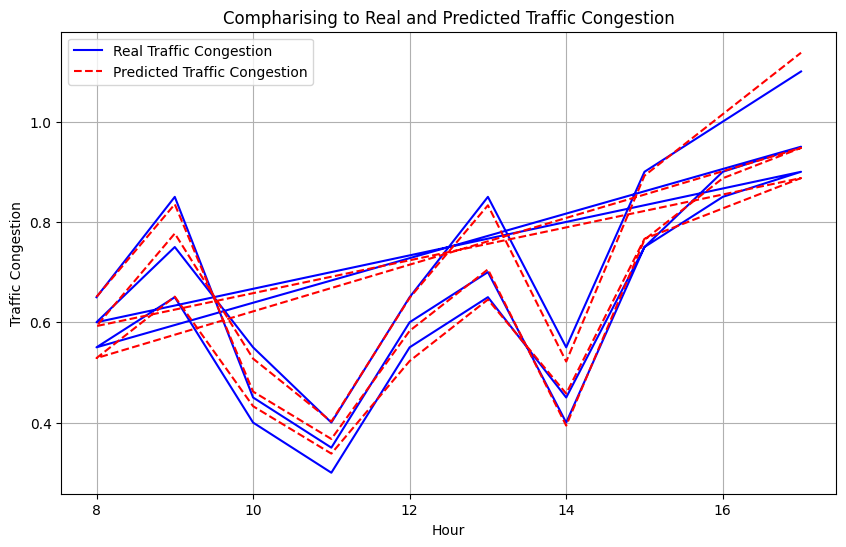

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Veriyi yükleyin
df = pd.read_csv("traffic_data.csv")

# Özellikler ve hedef değişkeni
X = df[["time_of_day", "day_of_week", "num_cars"]]
y = df["congestion"]

# Modeli eğit
model = LinearRegression()
model.fit(X, y)

# Tahmin yap
predicted_traffic = model.predict(X)

# Grafik: Gercek ve Tahmin Edilen Trafik Karşılaştırma
plt.figure(figsize=(10, 6))
plt.plot(df["time_of_day"], y, label="Real Traffic Congestion", color='blue')
plt.plot(df["time_of_day"], predicted_traffic, label="Predicted Traffic Congestion", color='red', linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Traffic Congestion")
plt.title("Compharising to Real and Predicted Traffic Congestion")
plt.legend()
plt.grid(True)
plt.show()


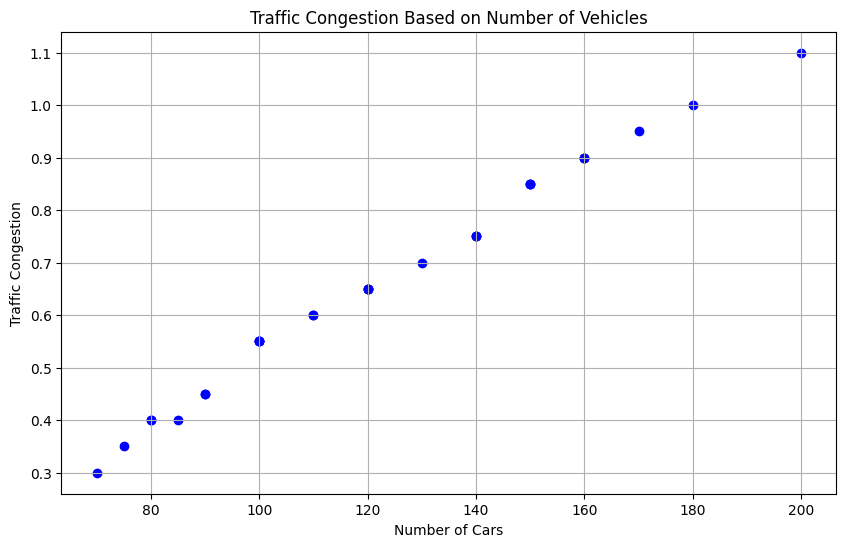

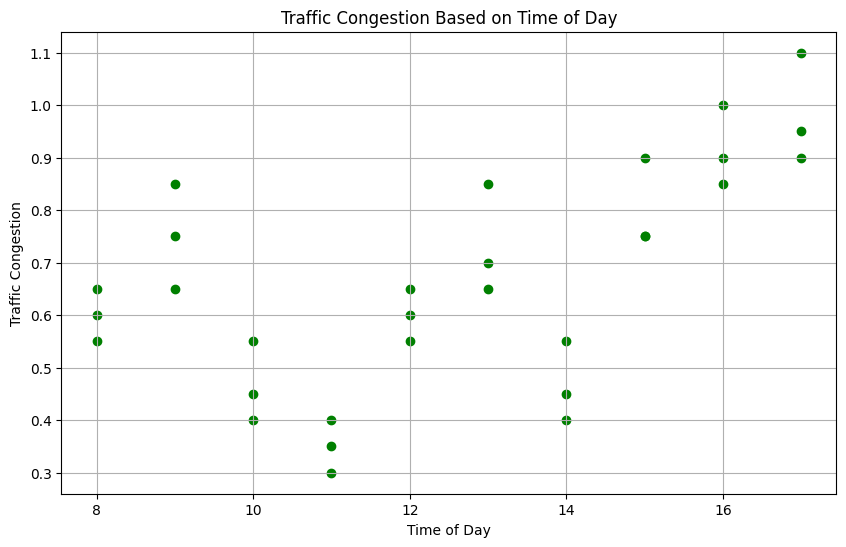

In [ ]:
# Grafik: Araç Sayisina Gore Trafik Sıkışıklığını Gorsellestirme
plt.figure(figsize=(10, 6))
plt.scatter(df["num_cars"], y, color='blue', label='Real Traffic Congestion')
plt.xlabel("Number of Cars")
plt.ylabel("Traffic Congestion")
plt.title("Traffic Congestion Based on Number of Vehicles")
plt.grid(True)
plt.show()

# Grafik: Gunun Saatine Gore Trafik Sıkışıklığını Gorsellestirme
plt.figure(figsize=(10, 6))
plt.scatter(df["time_of_day"], y, color='green', label='Real Traffic Congestion')
plt.xlabel("Time of Day")
plt.ylabel("Traffic Congestion")
plt.title("Traffic Congestion Based on Time of Day")
plt.grid(True)
plt.show()


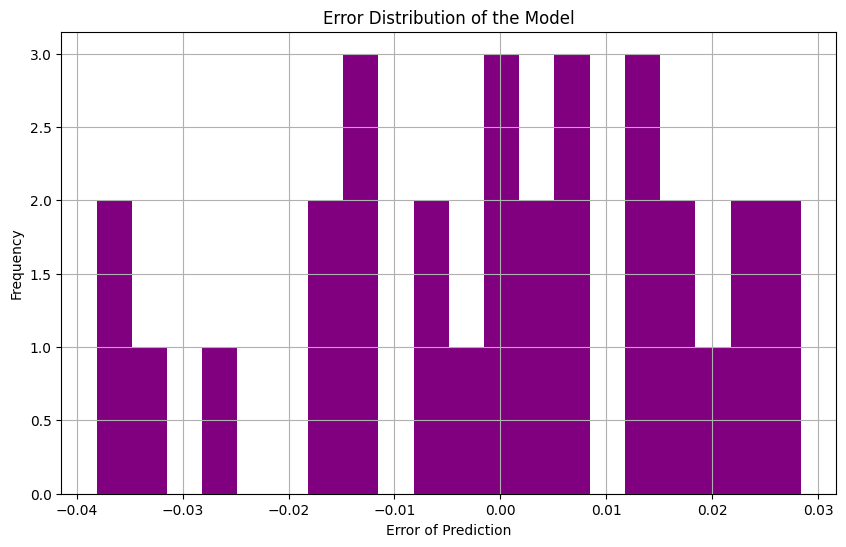

In [ ]:
# Hatalar
errors = y - predicted_traffic

# Grafik: Hata Dagilimi
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='purple')
plt.xlabel("Error of Prediction")
plt.ylabel("Frequency")
plt.title("Error Distribution of the Model")
plt.grid(True)
plt.show()


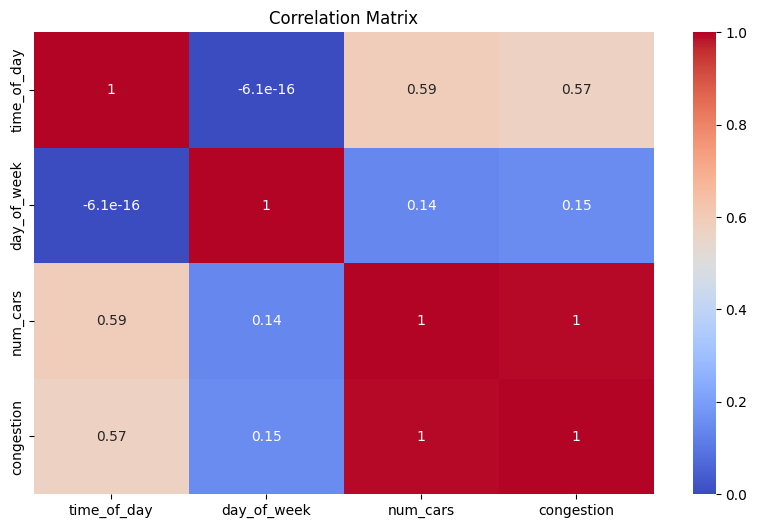

In [ ]:
import seaborn as sns

# Korelasyon Matrisi
correlation_matrix = df.corr()

# Korelasyon Matrisi Gorsellestirmesi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


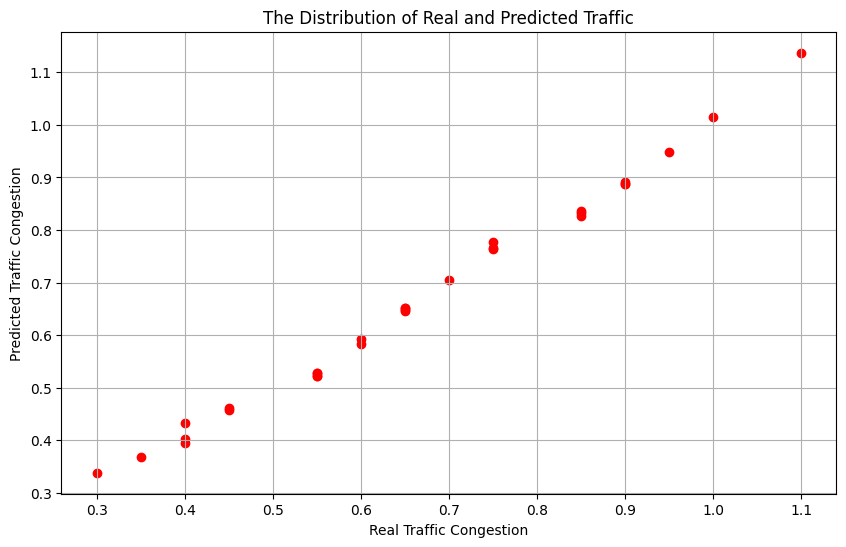

In [ ]:
# Grafik: Gercek ve Tahmin Edilen Degerler Uzerine Dagilim
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_traffic, color='red')
plt.xlabel("Real Traffic Congestion")
plt.ylabel("Predicted Traffic Congestion")
plt.title("The Distribution of Real and Predicted Traffic")
plt.grid(True)
plt.show()


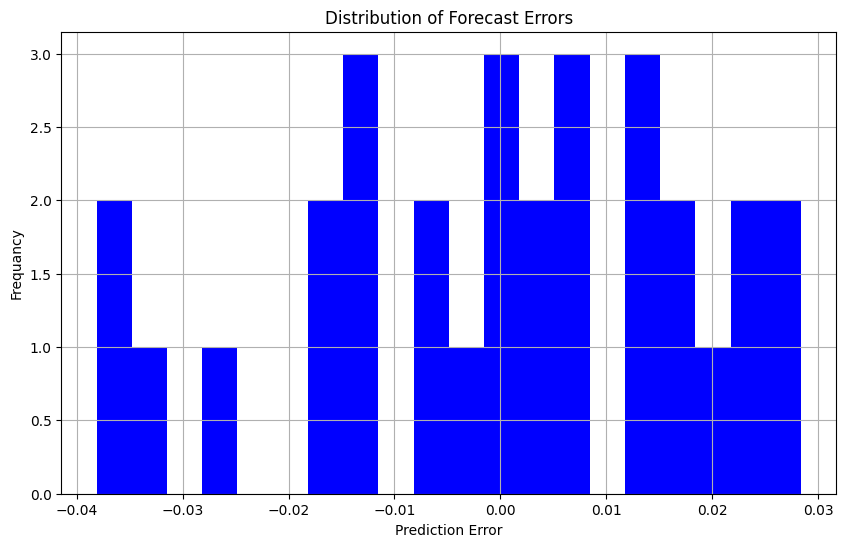

In [ ]:
# Errors
errors = y - predicted_traffic

# Grafik: Tahmin Hatalarinin Dagilimi
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='blue')
plt.xlabel("Prediction Error")
plt.ylabel("Frequancy")
plt.title("Distribution of Forecast Errors")
plt.grid(True)
plt.show()


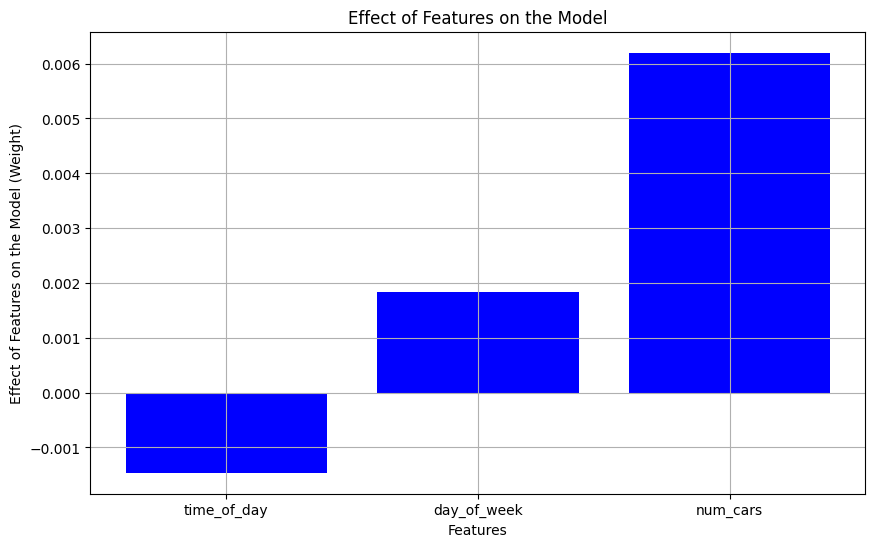

In [ ]:
# Grafik: Ozelliklerin Model Uzerindeki Etkisi
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_, color='blue')
plt.xlabel("Features")
plt.ylabel("Effect of Features on the Model (Weight)")
plt.title("Effect of Features on the Model")
plt.grid(True)
plt.show()


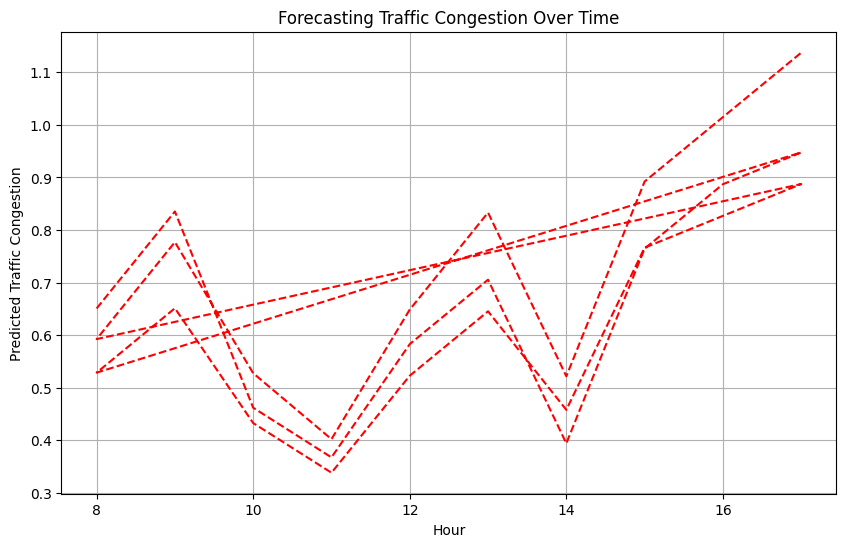

In [ ]:
# Grafik: Zaman Serisi Analizi (Zaman icinde degisen tahminler)
plt.figure(figsize=(10, 6))
plt.plot(df["time_of_day"], predicted_traffic, label="Predicted Traffic Congestion", color='red', linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Predicted Traffic Congestion")
plt.title("Forecasting Traffic Congestion Over Time")
plt.grid(True)
plt.show()


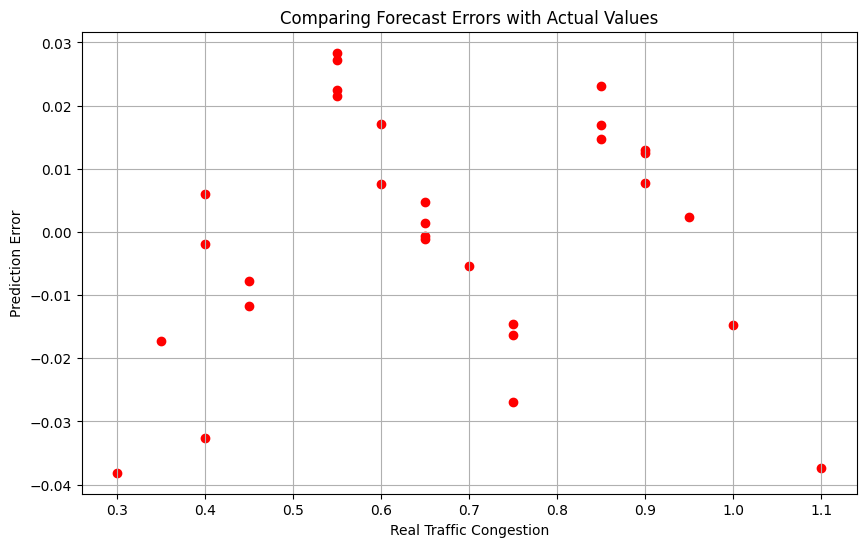

In [ ]:
# Grafik: Hata ile Gercek Degerlerin Karsilastirilmasi
plt.figure(figsize=(10, 6))
plt.scatter(y, errors, color='red')
plt.xlabel("Real Traffic Congestion")
plt.ylabel("Prediction Error")
plt.title("Comparing Forecast Errors with Actual Values")
plt.grid(True)
plt.show()

R Square:  0.9919595382262677
MSE:  0.0003408262407420951


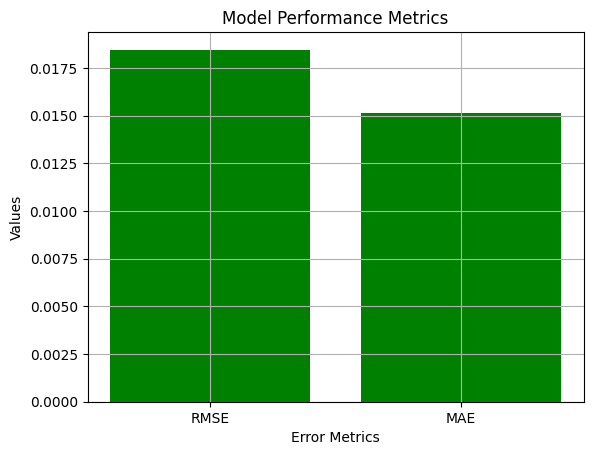

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hata Metriklerini Hesaplama
mse = mean_squared_error(y, predicted_traffic)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predicted_traffic)
r2 = r2_score(y, predicted_traffic)
print('R Square: ',r2)
print( 'MSE: ',mse)
# Grafik: Modelin Performansini Olcmek icn Hata Metrikleri
metrics = {'RMSE': rmse, 'MAE': mae}
plt.bar(metrics.keys(), metrics.values(), color='green')
plt.xlabel("Error Metrics")
plt.ylabel("Values")
plt.title("Model Performance Metrics")
plt.grid(True)
plt.show()


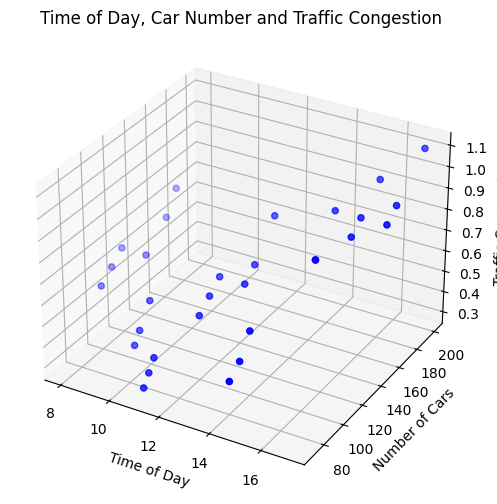

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Grafik: Gunun Saati, Arac Sayisi ve Trafik Durumu.  Yorumlamak zor. Öylesine Yaptık
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(df["time_of_day"], df["num_cars"], y, c='blue', marker='o')

ax.set_xlabel("Time of Day")
ax.set_ylabel("Number of Cars")
ax.set_zlabel("Traffic Congestion")
ax.set_title("Time of Day, Car Number and Traffic Congestion")
plt.show()


**Results and Analysis**

  1. In this study, a simulation was performed to predict traffic congestion and dynamically manage traffic lights at intersections. The results and analysis can be summarized as follows:
  Model Performance Linear Regression model was used to predict traffic congestion. The performance of the model on the dataset was examined and it was observed that the predicted traffic congestion values ​​largely matched the real values. However, it was evaluated that more features and a larger dataset were needed for the model to fully capture the complex traffic dynamics.
  2. Error Distribution and Feature Analysis Error Distribution: It was observed that the model's errors were generally low, but there were large deviations at some data points. This situation shows that the model has difficulty capturing the entire data variety with the current feature set. Effect of Features: When the weights of the features on the model were examined, it was determined that the number of vehicles was the most important factor in predicting traffic congestion.
  3. Visualization Findings Actual and Predicted Traffic Congestion: The model's predictions were generally close to the real values, but some deviations were observed, especially during rush hours. This may indicate that the model requires further fine-tuning in heavy traffic situations. Relationship between Number of Vehicles and Traffic Congestion: An expected linear relationship was observed between the number of vehicles and traffic congestion. As the number of vehicles increases, traffic congestion also tends to increase. Traffic Analysis by Time of Day: It was observed that traffic congestion increased significantly during morning and evening rush hours. This highlights the impact of daily routines on traffic flow.

